In [2]:
# データ自動生成
from sklearn.datasets import make_blobs
X, y = make_blobs(
    random_state=0, # シード値
    n_features=2,   # 特徴量の数
    centers=2,      # 塊の数
    cluster_std=1,  # ばらつき
    n_samples=300,  # データ数
)

# df
import pandas as pd
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,target
0,3.359415,5.248267,0
1,2.931100,0.782556,1
2,1.120314,5.758061,0
3,2.876853,0.902956,1
4,1.666088,5.605634,0


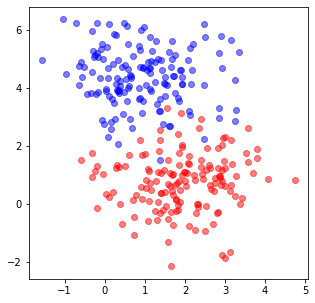

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# 分類ごとのdf
df0 = df[df['target']==0]
df1 = df[df['target']==1]

# 散布図
plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.show()

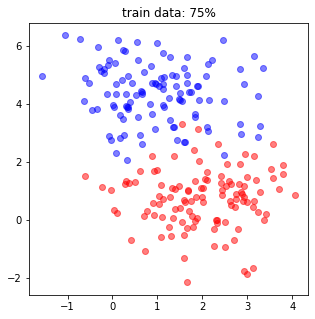

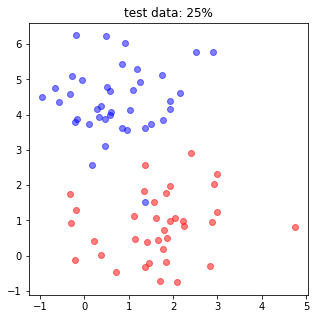

In [15]:
## データを学習用とテスト用に分ける
from sklearn.model_selection import train_test_split
# X_train 学習用データの問題(説明変数), y_train 学習用データの答え(目的変数)
# X_test テスト用データの問題(説明変数), y_test テスト用データの答え(目的変数)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 学習用データ描画
df = pd.DataFrame(X_train)
df['target'] = y_train

df0 = df[df['target']==0]
df1 = df[df['target']==1]

plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.title('train data: 75%')
plt.show()

# テスト用データ描画
df = pd.DataFrame(X_test)
df['target'] = y_test

df0 = df[df['target']==0]
df1 = df[df['target']==1]

plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.title('test data: 25%')
plt.show()

In [9]:
## 学習モデル作成 (サポートベクターマシン)
from sklearn import svm
model = svm.SVC()

# trainデータを渡して学習
model.fit(X_train, y_train)

SVC()

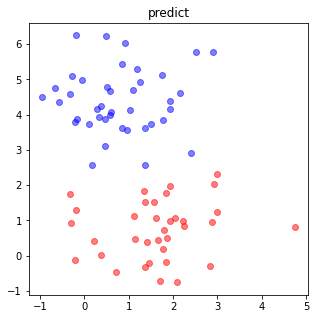

In [19]:
## モデルのテスト
# テスト用データを渡す
pred = model.predict(X_test)

# df テスト結果をtargetに設定
df = pd.DataFrame(X_test)
df['target'] = pred

df0 = df[df['target']==0]
df1 = df[df['target']==1]

plt.figure(figsize=(5, 5))
plt.scatter(df0[0], df0[1], color="b", alpha=0.5)
plt.scatter(df1[0], df1[1], color="r", alpha=0.5)
plt.title('predict')
plt.show()

In [20]:
## y_testと比較して正解率を調べる
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
score = accuracy_score(y_test, pred)

print('accuracy ' + str(score*100) + '%')

accuracy 96.0%
